In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.aqua.utils.arithmetic import normalize_vector

import numpy as np

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
state_simulator = Aer.get_backend('statevector_simulator')
unitary_simulator = Aer.get_backend('unitary_simulator')
backend = Aer.get_backend('qasm_simulator')

In [3]:
def Task2(params=[0,0]):
    qc = QuantumCircuit(qr, cr)
    qc.rx(params[0],0)
    qc.rx(params[1],1)
    qc.cx(0,1)
    qc.ry(params[2],0)
    qc.ry(params[3],1)
    qc.measure([0,1],[0,1])
    return qc

In [4]:
desired_vector = [0,1,1,0]
desired_vector = normalize_vector(desired_vector)
print(desired_vector)


[0.         0.70710678 0.70710678 0.        ]


In [9]:
qc_target = QuantumCircuit(qr, cr)
qc_target.initialize(desired_vector, [0,1])
# implement bell state |w> that get the state as 1/sqrt(2)(|01>+|10>)
# qc_target.x(1)
# qc_target.h(0)
# qc_target.cx(0,1)
qc_target.measure([0,1],[0,1])
qc_target.barrier()
qc_target.draw()

┌──────────────────────────────────┐┌─┐    ░ 
q0_0: ┤0                                 ├┤M├────░─
      │  initialize(0,0.70711,0.70711,0) │└╥┘┌─┐ ░ 
q0_1: ┤1                                 ├─╫─┤M├─░─
      └──────────────────────────────────┘ ║ └╥┘ ░ 
c0_0: ═════════════════════════════════════╩══╬════
                                              ║    
c0_1: ════════════════════════════════════════╩════

In [12]:
job = execute(qc_target, backend)
result = job.result()
result.get_counts()

{'01': 508, '10': 516}

In [11]:
def cost_fn(loss,m):
    return np.sum(loss ** 2) / (2 * m) 

In [119]:
numIterations = 1000
params = np.random.uniform(high=2 * np.pi, size=(4,4))[0]
print(params)
# params = np.array([0.0,0.0])
alpha = 0.1
history = []
for i in range(0,numIterations):
    circ = Task2(params=params)
    job = execute(circ, state_simulator, shots=10)
    result = job.result()
    state_vector = result.get_statevector(circ)
    loss = np.linalg.norm(state_vector - target_state_vector)
    cost = cost_fn(loss,4)
    grad = loss
    if i == 0:
        print('interation : {}'.format(i+1))
        print('state vector: {}'.format(state_vector))
        print('cost : {}'.format(cost))
        print(params)
        print('----------------------------')
    params -= (alpha*grad)/4
    history.append(cost)
print('interation : {}'.format(i+1))
print('state vector: {}'.format(state_vector))
print('cost : {}'.format(cost))
print(params)
print('----------------------------')
circ.draw()

[6.22897634 2.0641452  5.23149423 1.16518921]
interation : 1
state vector: [ 0.38014482+0.40447244j -0.1981575 -0.24358033j  0.250471  -0.61387588j
 -0.13056263+0.36968672j]
cost : 0.24075219272621576
[6.22897634 2.0641452  5.23149423 1.16518921]
----------------------------
interation : 1000
state vector: [-0.08091237+0.57977471j  0.17802317-0.28125988j  0.29714673+0.15787133j
 -0.65378138-0.07658642j]
cost : 0.16600103534016247
[-28.99083749 -33.15566864 -29.98831961 -34.05462463]
----------------------------


┌─────────────┐      ┌────────────┐
q29_0: ┤ RX(-28.962) ├──■───┤ RY(-29.96) ├
       ├─────────────┤┌─┴─┐┌┴────────────┤
q29_1: ┤ RX(-33.127) ├┤ X ├┤ RY(-34.026) ├
       └─────────────┘└───┘└─────────────┘
 c2_0: ═══════════════════════════════════
                                          
 c2_1: ═══════════════════════════════════

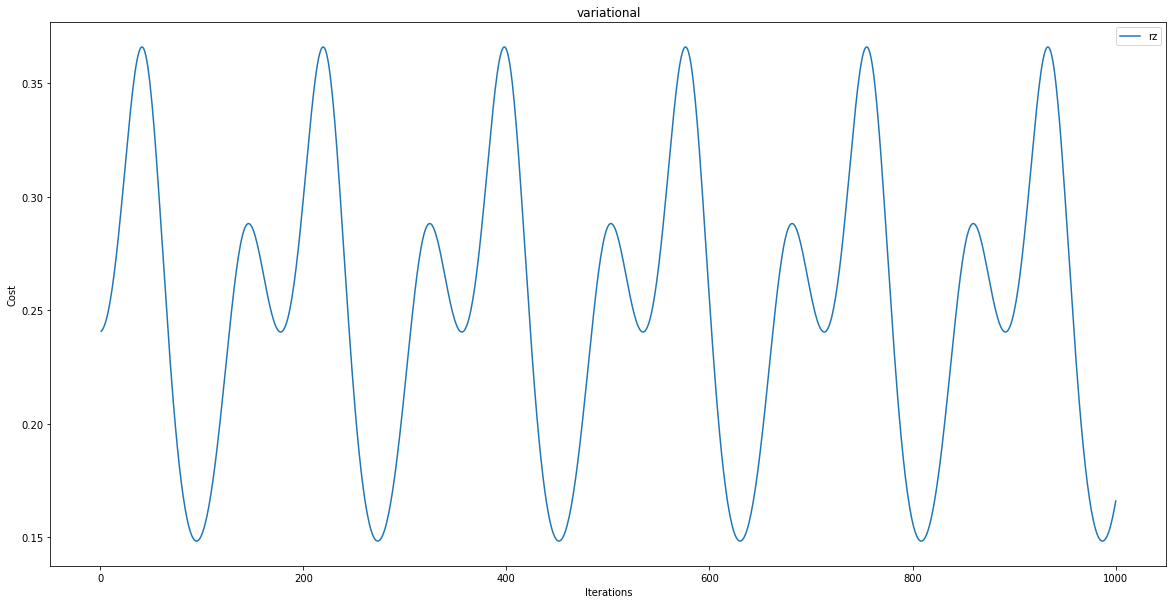

In [120]:
plt.figure(figsize=(20,10))
plt.plot(range(1, len(history) + 1), history)
plt.legend(['rz'], loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('variational')
plt.show()
